In [1]:
import os
import scvi
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib.pyplot import rc_context

Global seed set to 0


In [2]:
OUTDIR = "../results/08.iterative_clustering/"
os.path.exists(OUTDIR) or os.makedirs(OUTDIR)

True

In [3]:
adata = sc.read("../results/07.label_transfer.human/hTCA.core.h5ad")

In [4]:
adata.layers["counts"] = adata.X.tocsr()
adata.raw = adata  # keep full dimension safe

In [5]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="GSE_ID",
    subset=True
)

In [6]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="GSM_ID")
vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")
vae.train()
adata.obsm["X_scVI"] = vae.get_latent_representation()

INFO     Using batches from adata.obs["GSM_ID"]                                              
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Successfully registered anndata object containing 148843 cells, 2000 vars, 146      
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 54/54: 100%|███████████████████████████████| 54/54 [20:56<00:00, 23.27s/it, loss=733, v_num=1]


In [7]:
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata)

In [8]:
sc.tl.leiden(adata, resolution=.1, key_added="leiden_r1")

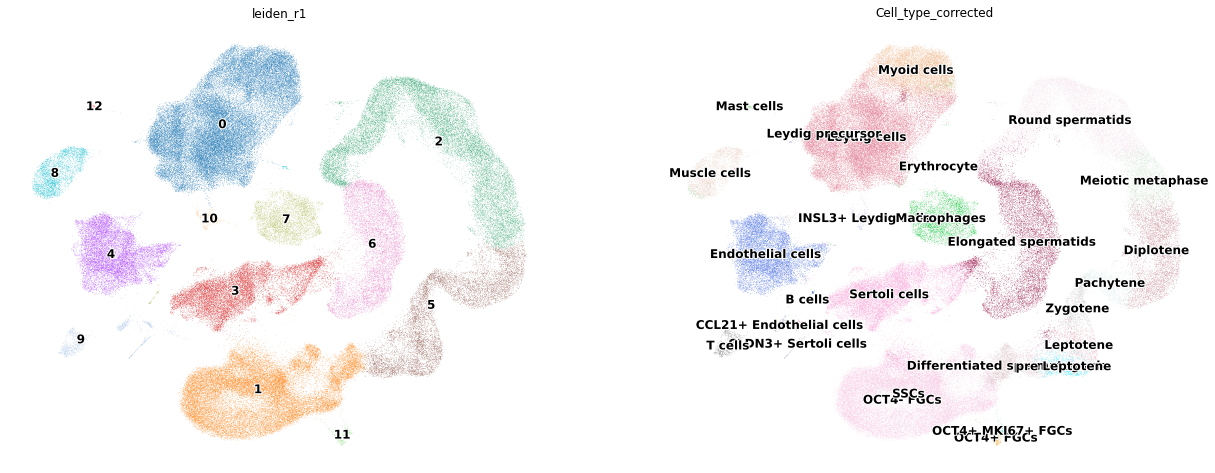

In [9]:
with rc_context({'figure.figsize': (10, 8)}):
    sc.pl.umap(adata, color=["leiden_r1","Cell_type_corrected"], 
               frameon=False, ncols=2,
               legend_loc='on data', legend_fontsize=12, legend_fontoutline=2)

In [36]:
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r2", restrict_to=("leiden_r1", ["0"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r2", restrict_to=("leiden_r2", ["1"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r2", restrict_to=("leiden_r2", ["2"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r2", restrict_to=("leiden_r2", ["3"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r2", restrict_to=("leiden_r2", ["5"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r2", restrict_to=("leiden_r2", ["9"]))
sc.tl.leiden(adata, resolution=0.2, key_added="leiden_r2", restrict_to=("leiden_r2", ["11"]))

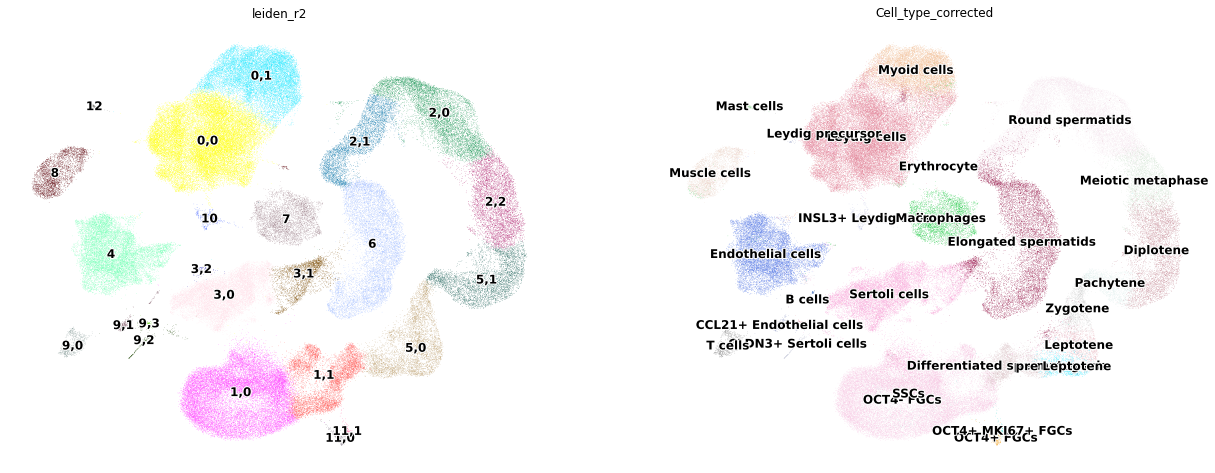

In [37]:
with rc_context({'figure.figsize': (10, 8)}):
    sc.pl.umap(adata, color=["leiden_r2","Cell_type_corrected"], 
               frameon=False, ncols=2,
               legend_loc='on data', legend_fontsize=12, legend_fontoutline=2)

In [12]:
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r3", restrict_to=("leiden_r2", ["9,2"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r3", restrict_to=("leiden_r3", ["5,0"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r3", restrict_to=("leiden_r3", ["2,2"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r3", restrict_to=("leiden_r3", ["1,1"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r3", restrict_to=("leiden_r3", ["0,1"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r3", restrict_to=("leiden_r3", ["5,1"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r3", restrict_to=("leiden_r3", ["3,1"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r3", restrict_to=("leiden_r3", ["9,3"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r3", restrict_to=("leiden_r3", ["2,1"]))

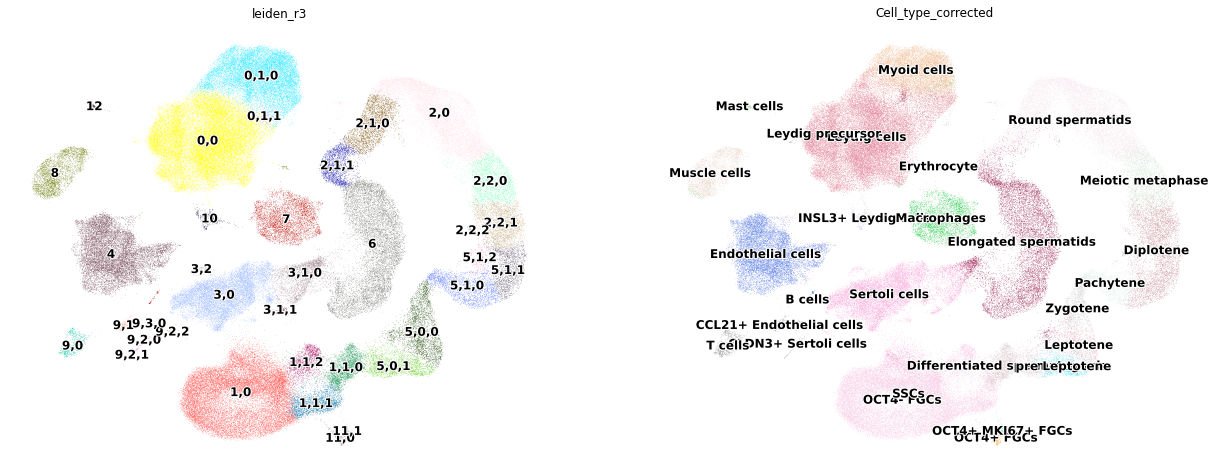

In [13]:
with rc_context({'figure.figsize': (10, 8)}):
    sc.pl.umap(adata, color=["leiden_r3","Cell_type_corrected"], 
               frameon=False, ncols=2,
               legend_loc='on data', legend_fontsize=12, legend_fontoutline=2)

In [51]:
sc.tl.leiden(adata, resolution=0.3, key_added="leiden_r4", restrict_to=("leiden_r3", ["1,0"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r4", restrict_to=("leiden_r4", ["5,0,0"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r4", restrict_to=("leiden_r4", ["5,0,1"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r4", restrict_to=("leiden_r4", ["9,2,0"]))
sc.tl.leiden(adata, resolution=0.2, key_added="leiden_r4", restrict_to=("leiden_r4", ["3,1,0"]))
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_r4", restrict_to=("leiden_r4", ["5,1,0"]))

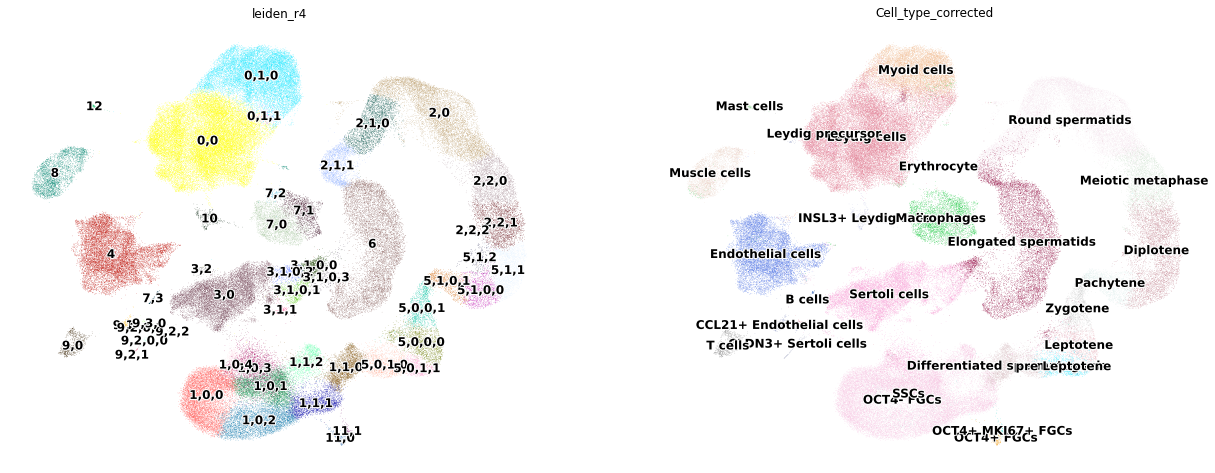

In [52]:
with rc_context({'figure.figsize': (10, 8)}):
    sc.pl.umap(adata, color=["leiden_r4","Cell_type_corrected"], 
               frameon=False, ncols=2,
               legend_loc='on data', legend_fontsize=12, legend_fontoutline=2)

In [48]:
cellmeta = pd.DataFrame(adata.obsm['X_umap'])
cellmeta.columns = ["UMAP_1", "UMAP_2"]
cellmeta.index = adata.obs.index
cellmeta['leiden_r1'] = adata.obs["leiden_r1"]
cellmeta['leiden_r2'] = adata.obs["leiden_r2"]
cellmeta['leiden_r3'] = adata.obs["leiden_r3"]
cellmeta['leiden_r4'] = adata.obs["leiden_r4"]

cellmeta.to_csv("../results/08.iterative_clustering/hTCA_cellmeta_iter_clusters.csv")

In [50]:
adata.write_h5ad("../results/08.iterative_clustering/hTCA_iter_clusters.h5ad")